### Given Data
- from Institute of Atmospheric Physics Kühlungsborn (IAP)
- Differentiated between ERA5 and UA-ICON(NWP) data
NWP4A60: data at pressure levels and analysis
    - SWM2.tar: major warming diagnostics
    - SWE2.tar: elliptic diagnostics of Z10
    - SWX2.tar: extended diagnostics (VPN)
    - SWC2.tar: classification synthesis (VPN)

#### File structure
netCDF files are 3-dimensional data, investigated with ncdump. The .tar-files contain all output from Christoph Zülickes diagnosis, in particular:
- SWM: ASCII values in 2 files, 
    1. *cen.csv with the major warming events as identified with their central day when the wind turned from westerly to easterly along with some characteristics and
    2. *msw.csv with daily lists with wind and a marker mw for major warming
- SWE: 1 csv file
    - *d.csv: daily list of indices, including the aspect ratio of the mother vortex (ar), centrail latitude (latcent) and area (area)

In [1]:
import arctic as arctic
from arctic.io.loader import read_data
from arctic.io.cleaner import no_white_space, to_date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nwp_d = read_data("../data/SWXClust/NWP4A60/i4a60e2_d.csv")
nwp_cen= read_data("../data/SWXClust/NWP4A60/i4a60m2t-cen.csv")
nwp_msw = read_data("../data/SWXClust/NWP4A60/i4a60m2t-msw.csv")

no_white_space(nwp_d)
no_white_space(nwp_cen)
no_white_space(nwp_msw)

# change string to datetime for better comparison
to_date(nwp_d, 'string')
to_date(nwp_cen, 'string')
to_date(nwp_msw, 'string')

# replace empty strings
nwp_d = nwp_d.replace('                   ' ,np.NaN)

nwp_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22462 entries, 0 to 22461
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   D          22462 non-null  object        
 1   counter    22462 non-null  int64         
 2   time       22462 non-null  float64       
 3   string     22462 non-null  datetime64[ns]
 4   year       22462 non-null  int64         
 5   month      22462 non-null  int64         
 6   day        22462 non-null  int64         
 7   hour       22462 non-null  int64         
 8   level      22462 non-null  float64       
 9   edge       22462 non-null  float64       
 10  form       22462 non-null  object        
 11  area       22462 non-null  float64       
 12  obj_area   22462 non-null  float64       
 13  latcent    22462 non-null  float64       
 14  loncent    22462 non-null  float64       
 15  theta      22462 non-null  float64       
 16  ar         22462 non-null  float64      

## Features in data and their description

### all files:

| Feature name | Description                 | Values                   |
|--------------|-----------------------------|--------------------------|
| D            | line belongs to data in csv | 'D'                      |
| num          | Counter of events (ex. SSW) | [1, 22462.000000                     |
| counter      | Central time counter        |                          |
| time         | Julian central date         |                          |
| string       | YYYY-MM-DD Date format      | [1979-01-01, 2040-12-06] |

#### for *cen files

| Feature name | Description               | Values        | Units    |
|--------------|---------------------------|---------------|----------|
| pers         | Persistence of event      | [1, 22]       | days     |
| Umax         | max. east wind during SSW | [-21.2, -0.3] | m/s      |
| Imax         | max. SSW intensity        | [0.3, 390.7]  | days m/s |
| Iacc         | accumulated SSW intensity | [0.3, 232.6]  | days m/s |

#### for *msw files
| Feature name | Description         | Values               | Units |
|--------------|---------------------|----------------------|-------|
| u            | zonal wind          | [-21.1, 77.5]        | m/s   |
| MW           | marks major warming | [0, 1] (i.e. no/yes) |       |

#### for *d files
| Feature name                         | Description                              | Values                       | Units  |
|--------------------------------------|------------------------------------------|------------------------------|--------|
| year, month, day, hour               | respective to string                     |                              |        |
| level                                | pressure level in the atmosphere         | 10                           | hPa    |
| edge                                 | latitudal circal that encompasses the pv | [28.9, 32.2]                 | Deg    |
| form                                 | Disturbed or split vortex                | ['D', 'S']                   | string |
| area                                 | Area of PV                               | [7.961400e+06, 1.622100e+08] | km^2   |
| obj_area                             | Objective area of PV                     | [1.076600e+04, 2.759100e+06] | km^2   |
| latcent                              | Latitude of PV Center                    | [50.414000, 89.972000]       | Deg    |
| loncent                              | Longitude of PV Center                   | [-89.949000, 269.960000]     | Deg    |
| theta                                | Angle of PV major axis                   | [-1.570700, 1.570800]        | Rad    |
| ar                                   | Aspect ratio of PV                       | [1.000100, 4.368600]         |        |
| kurtosis                             | Kurtosis of PV                           | [-0.668210, 8.968100]        |        |
| area, obj_area, latcent, loncent, ar | for the two daughter vortexes            |                              |        |
| amp0                                 | zonal mean                               | [27.100000, 32.200000]       |        |
| amp1                                 | amplitude of wave 1                      | [0.000013, 0.103000]         |        |
| amp2                                 | amplitude of wave 2                      | [0.000007, 0.091600]         |        |
| lon1                                 | angle of wave1                           | [-180, 180]                  | Deg    |
| lon2                                 | angle of wave2                           | [-180, 180]                  | Deg    |

### Handling NaN Values
- *cen-file produces most NaN values in data due to merch and marking special events &rArr; 0 reasonable for *num, counter, time, pers, Imax, Iacc, Umax
- *d file produces also a lot of NaN values, when form = 'S', i.e. split with 2 new vortexes &rArr; for $$k\in\{1,2\}, \theta_k \in \{-1.6, 1.6\}, loncent_k \in \{-180, 180\}$$ &rArr; 0 no suitable replacement for NaN; instead -999 is used as obviously no valid value for theta nor coordinates.

In [2]:
# merge data to one big dataframe
nwp = nwp_d.merge(nwp_msw, on ='string', how='left', suffixes=[None, '_msw']).merge(nwp_cen, on='string', how='left', suffixes = ['_d', '_cen'])

# Uncomment the 2 lines below to check if 0 is a valid replacement for NaN values
# print(nwp.iloc[:, -7:].max())
# print(nwp.iloc[:, -7:].min())
# fillna in *cen
nwp.iloc[:, -8:] = nwp.iloc[:, -8:].fillna(0)

# change dtype and fill NaN values when split vortex
cols = nwp.columns[18:30]
cols_999 = ['theta1', 'theta2', 'loncent1', 'loncent2']
nwp[cols] = nwp[cols].apply(pd.to_numeric, errors='coerce')
nwp[cols_999] = nwp[cols_999].fillna(-999)
nwp[cols] = nwp[cols].fillna(0)


# encode MW as MW = 1, else 0
from sklearn.preprocessing import LabelEncoder
le_mw = LabelEncoder()
nwp['MW'] = le_mw.fit_transform(nwp.MW)
print(f"Transformed 'MW':\n{le_mw.inverse_transform([1])} to 1\n{le_mw.inverse_transform([0])} to 0")

# encode form with label encoder
le_form = LabelEncoder()
nwp['form'] = le_form.fit_transform(nwp.form)
print(f"Transformed 'form':\n{le_form.inverse_transform([1])} to 1\n{le_form.inverse_transform([0])} to 0")

# drop D_*
nwp = nwp.drop(['D_cen', 'D_d', 'D_msw'], axis=1)
nwp.info()

Transformed 'MW':
['MW'] to 1
[''] to 0
Transformed 'form':
['S'] to 1
['D'] to 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22462 entries, 0 to 22461
Data columns (total 45 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   counter_d    22462 non-null  int64         
 1   time_d       22462 non-null  float64       
 2   string       22462 non-null  datetime64[ns]
 3   year         22462 non-null  int64         
 4   month        22462 non-null  int64         
 5   day          22462 non-null  int64         
 6   hour         22462 non-null  int64         
 7   level        22462 non-null  float64       
 8   edge         22462 non-null  float64       
 9   form         22462 non-null  int64         
 10  area         22462 non-null  float64       
 11  obj_area     22462 non-null  float64       
 12  latcent      22462 non-null  float64       
 13  loncent      22462 non-null  float64       
 14  theta        22462 n

In [3]:
# correlation within data
arctic.plot_correlation(nwp, savefig="../output/corr_nwp.png")

,counter_d,time_d,year,month,day,hour,level,edge,form,area,obj_area,latcent,loncent,theta,ar,kurtosis,area1,obj_area1,latcent1,loncent1,theta1,ar1,area2,obj_area2,latcent2,loncent2,theta2,ar2,amp0,amp1,amp2,lon1,lon2,counter_msw,time_msw,u,MW,num,counter_cen,time_cen,pers,Umax,Imax,Iacc
counter_d,1.000000,1.000000,0.999868,0.003952,0.001382,nan,nan,-0.017441,-0.031118,-0.003670,0.012101,0.008671,0.005552,-0.015708,-0.017428,0.003830,-0.030522,-0.027127,-0.032980,-0.031061,-0.031107,-0.027068,-0.030750,-0.027188,-0.032168,-0.031505,-0.031123,-0.024966,-0.022834,0.001959,0.013661,0.000331,-0.000797,1.000000,1.000000,0.031896,0.008637,0.020089,0.019144,0.002923,0.002777,0.000075,0.003018,0.002856
time_d,1.000000,1.000000,0.999868,0.003952,0.001382,nan,nan,-0.017441,-0.031118,-0.003670,0.012101,0.008671,0.005552,-0.015708,-0.017428,0.003830,-0.030522,-0.027127,-0.032980,-0.031061,-0.031107,-0.027068,-0.030750,-0.027188,-0.032168,-0.031505,-0.031123,-0.024966,-0.022834,0.001959,0.013661,0.000331,-0.000797,1.000000,1.000000,0.031896,0.008637,0.020089,0.019144,0.002923,0.002777,0.000075,0.003018,0.002856
year,0.999868,0.999868,1.000000,-0.012251,-0.000142,nan,nan,-0.019907,-0.030468,-0.003796,0.012914,0.006164,0.005158,-0.015299,-0.017336,0.003715,-0.029878,-0.026580,-0.032376,-0.030438,-0.030457,-0.026378,-0.030090,-0.026658,-0.031577,-0.030849,-0.030472,-0.024294,-0.024995,0.006504,0.017607,0.000025,0.001391,0.999868,0.999868,0.033197,0.008961,0.020039,0.019084,0.002829,0.002878,-0.000022,0.003226,0.003055
month,0.003952,0.003952,-0.012251,1.000000,0.010500,nan,nan,0.154613,-0.040354,0.009609,-0.049176,0.155482,0.024051,-0.024090,-0.006328,0.013649,-0.040139,-0.035011,-0.037829,-0.038740,-0.040327,-0.041659,-0.041414,-0.034113,-0.036998,-0.040679,-0.040355,-0.041017,0.135855,-0.282448,-0.245113,0.019998,-0.133743,0.003952,0.003952,-0.082815,-0.022225,0.002373,0.003001,0.005320,-0.006263,0.006084,-0.012756,-0.012203
day,0.001382,0.001382,-0.000142,0.010500,1.000000,nan,nan,0.010352,0.004909,0.012366,-0.003974,0.001916,0.015686,-0.007555,-0.005085,-0.089829,0.006561,0.014588,0.008547,0.005560,0.004906,-0.008436,0.009994,0.016573,0.008578,0.004802,0.004916,-0.003209,0.011173,-0.007962,-0.011954,-0.008030,0.007350,0.001382,0.001382,-0.011569,0.021488,0.006947,0.007011,0.004469,-0.001545,0.000514,-0.002669,-0.002817
hour,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
level,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
edge,-0.017441,-0.017441,-0.019907,0.154613,0.010352,nan,nan,1.000000,-0.008673,0.807828,0.324020,0.386560,0.377750,0.193253,-0.403639,-0.145643,-0.008962,-0.025384,-0.011324,-0.006369,-0.008671,-0.003460,-0.008747,-0.027412,-0.011671,-0.008619,-0.008660,-0.001978,0.979869,-0.805063,-0.822270,0.145536,0.393540,-0.017441,-0.017441,-0.913858,-0.018936,-0.007036,-0.007129,-0.008230,-0.006897,0.006030,-0.004312,-0.004529
form,-0.031118,-0.031118,-0.030468,-0.040354,0.004909,nan,nan,-0.008673,1.000000,-0.052641,-0.054247,-0.066217,-0.026256,0.010341,0.439993,-0.014599,0.967728,0.748870,0.990313,0.992201,0.999999,0.936966,0.970466,0.768113,0.991514,0.999646,1.000000,0.947862,0.015798,-0.017332,-0.023814,-0.016211,0.044763,-0.031118,-0.031118,-0.042399,0.059322,0.007666,0.007607,0.019394,0.031165,-0.027608,0.026442,0.026939
area,-0.003670,-0.003670,-0.003796,0.009609,0.012366,nan,nan,0.807828,-0.052641,1.000000,0.660935,0.475690,0.297919,0.132341,-0.502716,-0.336794,-0.047061,-0.034092,-0.052709,-0.052583,-0.052639,-0.050778,-0.047413,-0.035165,-0.052562,-0.052674,-0.052640,-0.051466,0.760882,-0.625754,-0.593962,0.138901,0.333123,-0.003670,-0.003670,-0.711003,-0.030860,-0.011117,-0.011049,-0.011631,-0.009893,0.009194,-0.006877,-0.007076


In [24]:
from sklearn.preprocessing import StandardScaler
# same conditions as hannachi et al.
print(nwp.shape)
nwp = nwp[nwp.month.isin([12,1,2,3])]
print(nwp.shape)

nwp_ar_latcent = nwp[['string', 'ar', 'latcent']]
sc = StandardScaler()
nwp_ar_latcent[['sc_ar', 'sc_latcent']] = sc.fit_transform(nwp_ar_latcent[['ar', 'latcent']])

nwp_ar_latcent_area = nwp[['string', 'ar', 'latcent', 'area']]
nwp_ar_latcent_area[['sc_ar', 'sc_latcent', 'sc_area']] = sc.fit_transform(nwp_ar_latcent_area[['ar', 'latcent', 'area']])

(22462, 45)
(7487, 45)


/tmp/ipykernel_3740/1523741482.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nwp_ar_latcent[['sc_ar', 'sc_latcent']] = sc.fit_transform(nwp_ar_latcent[['ar', 'latcent']])
/tmp/ipykernel_3740/1523741482.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nwp_ar_latcent[['sc_ar', 'sc_latcent']] = sc.fit_transform(nwp_ar_latcent[['ar', 'latcent']])
/tmp/ipykernel_3740/1523741482.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [25]:
X = nwp.drop('string', axis=1)
X2 = nwp[['ar', 'latcent']] # nwp_ar_latcent[['sc_ar', 'sc_latcent']]
X3 = nwp[['ar', 'latcent', 'area']] #nwp_ar_latcent_area[['sc_ar', 'sc_latcent', 'sc_area']]
k_max = 5
K = np.arange(1, k_max+1)
n = 10

gap = arctic.gap_statistic(X, k_max=k_max, n_replicates=n)
gap_ar_latcent = arctic.gap_statistic(X2, k_max=k_max, n_replicates=n)
gap_ar_latcent_area = arctic.gap_statistic(X3, k_max=k_max, n_replicates=n)

elbow = arctic.elbow_method(X, k_max=k_max)
elbow_ar_latcent = arctic.elbow_method(X2, k_max=k_max)
elbow_ar_latcent_area = arctic.elbow_method(X3, k_max=k_max)

silhouette = arctic.silhouette_method(X, k_max=k_max)
silhouette_ar_latcent = arctic.silhouette_method(X2, k_max=k_max)
silhouette_ar_latcent_area = arctic.silhouette_method(X3, k_max=k_max)

In [26]:
def plot_k(X, X1, X2, 
           ylabel,
           save,
           K=K,
           label = ['All features', 'AR, Latcent', 'AR, Latcent, AREA']):
    X_all = [X, X1, X2]
    for x,l in zip(X_all,label):
        plt.plot(K, x, label=l)
        
    plt.legend()
    plt.xticks(K)
    plt.xlabel('Number of clusters')
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.savefig(save)
    plt.show()

ValueError: 'x' and 'y' must have the same size

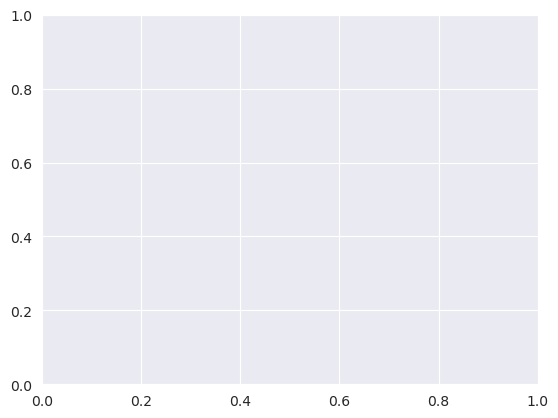

In [27]:
# gap statistic
plt.errorbar(np.arange(1,11), gap[:, 0], yerr=gap[:, 1], label='All features')
plt.errorbar(np.arange(1,11), gap_ar_latcent[:, 0], yerr=gap_ar_latcent[:, 1], label='AR, Latcent')
plt.errorbar(np.arange(1,11), gap_ar_latcent_area[:, 0], yerr=gap_ar_latcent[:, 1], label='AR, Latcent, AREA')
plt.legend()
plt.xticks(np.arange(1,11))
plt.xlabel('Number of clusters')
plt.title('Gap statistic (NWP)')
plt.ylabel('G(k)')
plt.tight_layout()
# plt.savefig('./output/gap_nwp.png')
plt.show()

# plot_k(elbow[:][1], elbow_ar_latcent[:][1], elbow_ar_latcent_area[:][1], ylabel="Inertia", save="./output/Elbow_inertia_nwp.png")
# plot_k(elbow[:][0], elbow_ar_latcent[:][0], elbow_ar_latcent_area[:][0], ylabel="Distortion", save="./output/Elbow_distortion_nwp.png")
# plot_k(silhouette, silhouette_ar_latcent, silhouette_ar_latcent_area, ylabel="Silhouette coefficient", save="./output/silhouette_nwp.png", K=K[1:])

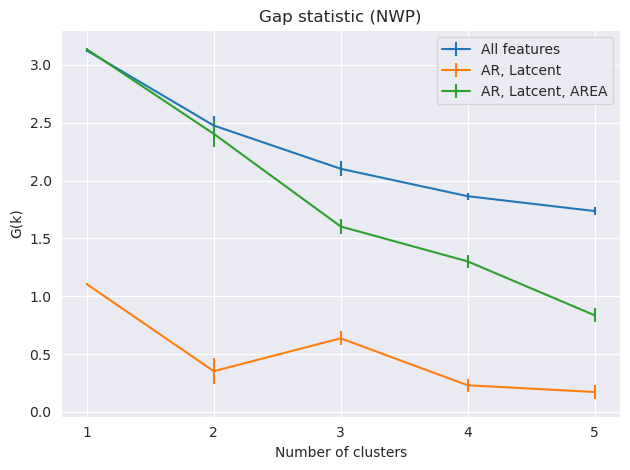

In [28]:
# gap statistic
plt.errorbar(np.arange(1,6), gap[:, 0], yerr=gap[:, 1], label='All features')
plt.errorbar(np.arange(1,6), gap_ar_latcent[:, 0], yerr=gap_ar_latcent[:, 1], label='AR, Latcent')
plt.errorbar(np.arange(1,6), gap_ar_latcent_area[:, 0], yerr=gap_ar_latcent[:, 1], label='AR, Latcent, AREA')
plt.legend()
plt.xticks(np.arange(1,6))
plt.xlabel('Number of clusters')
plt.title('Gap statistic (NWP)')
plt.ylabel('G(k)')
plt.tight_layout()
# plt.savefig('./output/gap_nwp.png')
plt.show()

# plot_k(elbow[:][1], elbow_ar_latcent[:][1], elbow_ar_latcent_area[:][1], ylabel="Inertia", save="./output/Elbow_inertia_nwp.png")
# plot_k(elbow[:][0], elbow_ar_latcent[:][0], elbow_ar_latcent_area[:][0], ylabel="Distortion", save="./output/Elbow_distortion_nwp.png")
# plot_k(silhouette, silhouette_ar_latcent, silhouette_ar_latcent_area, ylabel="Silhouette coefficient", save="./output/silhouette_nwp.png", K=K[1:])